# Analysis 5:
Comparison and analysis of the 'listings.csv' file for both Boston and Seattle Airbnb data for the following information:
1. Popular Neighborhoods in Boston and Seattle
2. Variations in Price based on Neighborhoods in Boston and Seattle
3. Using NLTK package to find most common words used in listings for both cities.

'listings.csv' contains complete detailed information on every listing ID.

Packages used are:
numpy, pandas, matplotlib, seaborn, nltk

In [2]:
# Cell contains import statements etc. for analysis
import numpy as np
import pandas as pd
import os
os.chdir('..')
os.chdir('..') # Setting root directory
cwd = os.getcwd()

from nltk import wordpunct_tokenize          
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sns

# Plots the figures in same place instead of a new window
%matplotlib inline

In [3]:
# Loading data into DFs for both Boston and Seattle
bostonListings = pd.read_csv(cwd+"//"+"Data//Boston//listings.csv")
seattleListings = pd.read_csv(cwd+"//"+"Data//Seattle//listings.csv")

In [4]:
# Part I: Show all neighborhoods in Boston and Seattle
bostonListings.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False)

,id
neighbourhood_cleansed,
Jamaica Plain,343
South End,326
Back Bay,302
Fenway,290
Dorchester,269
Allston,260
Beacon Hill,194
Brighton,185
South Boston,174


In [5]:
seattleListings.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False)

,id
neighbourhood_cleansed,
Broadway,397
Belltown,234
Wallingford,167
Fremont,158
Minor,135
University District,122
Stevens,119
First Hill,108
Central Business District,103


In [6]:
# Part II: Variations in price based on neighborhood in Boston

# For Boston:
# Replacing ',' in price with '.'
if bostonListings.price.dtype != np.float64:
    bostonListings.price= bostonListings.price.map(lambda p : float(p[1:-3].replace(',','')))

# Defining sort order for plotting box plot by grouping data based on property_type and average prices
sortOrderBoston = bostonListings.groupby('neighbourhood')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index

# For Seattle:
# Replacing ',' in price with '.'
if seattleListings.price.dtype != np.float64:
    seattleListings.price= seattleListings.price.map(lambda p : float(p[1:-3].replace(',','')))

# Defining sort order for plotting box plot by grouping data based on property_type and average prices
sortOrderSeattle = seattleListings.groupby('neighbourhood')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index

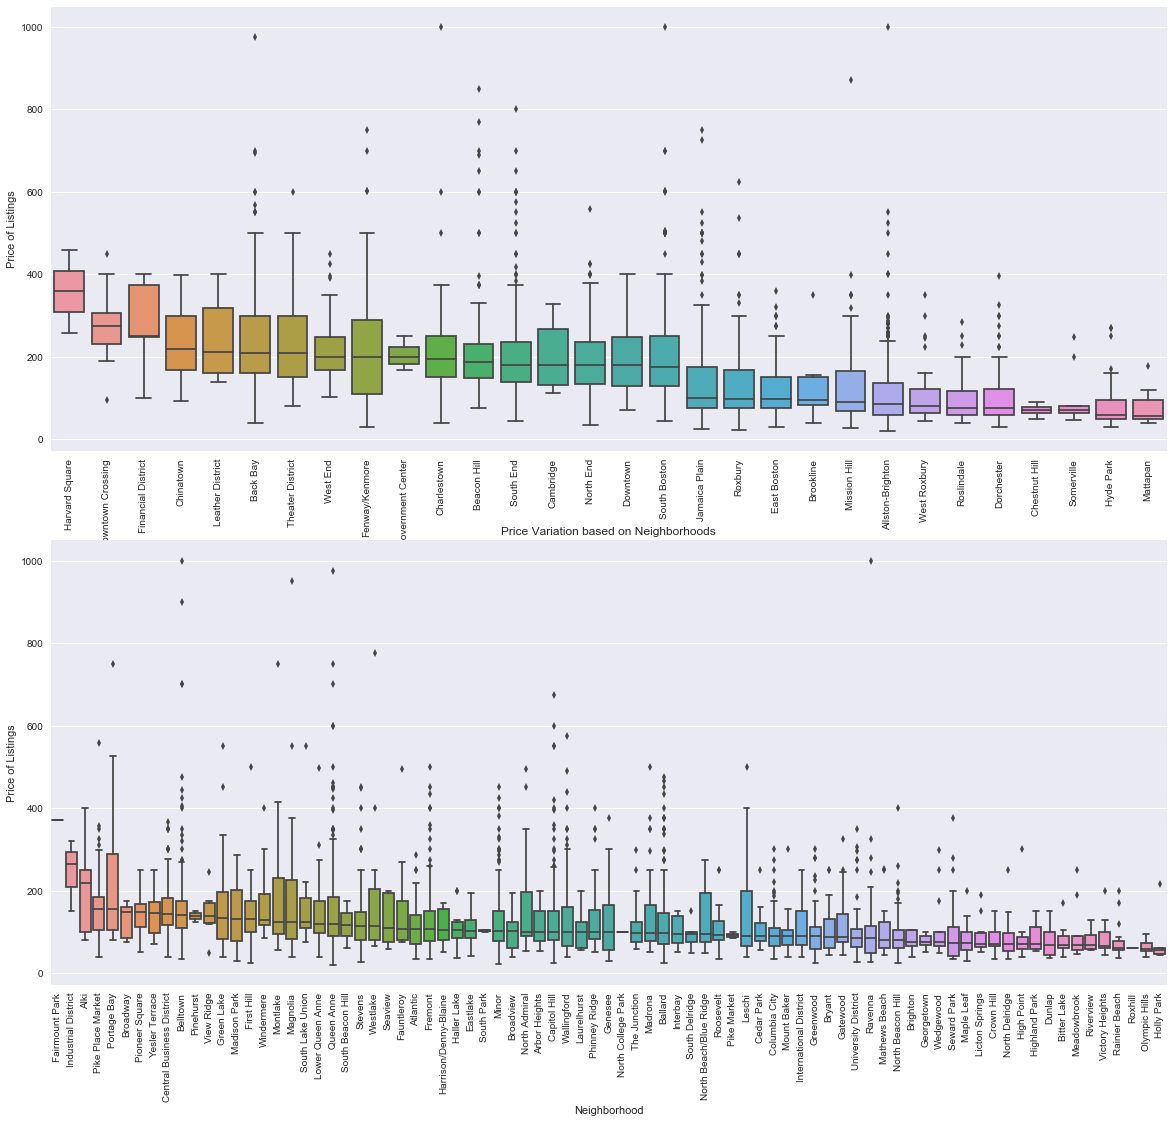

In [7]:
# Plotting box plot to see prices for the different neighborhoods in Boston and Seattle
# Using 'query' parameter to take listings having price lesser than 1000 to get a better plot

fig= plt.figure(figsize=(20,18));   
ax1 = fig.add_subplot(2,1,1);  
ax2 = fig.add_subplot(2,1,2);

sns.boxplot(y='price', x='neighbourhood', data=bostonListings.query('price <= 1000'), 
            order=sortOrderBoston, ax=ax1)
sns.boxplot(y='price', x='neighbourhood', data=seattleListings.query('price <= 1000'), 
            order=sortOrderSeattle, ax=ax2)
ax1.set_xlabel('Neighborhood')
ax1.set_ylabel('Price of Listings')
ax2.set_xlabel('Neighborhood')
ax2.set_ylabel('Price of Listings')
plt.title('Price Variation based on Neighborhoods')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.savefig(cwd+"//analysis//analysis-5//Output.jpg", dpi=600) # Saving image in Outputs
plt.show()

# Part II Conclusion:
- Above Box plots shows variation in prices based on the neighborhoods for Boston and seattle.
- Box plot is more informative as it gives us the median/mean value, as well as the upper and lower whiskers (Scores outside the middle 50% values)
- Here, comparing on median values, we can see that:
    1. In Boston, most expensive areas are Harvard Square, Downtown Crossing, Financial Distict and the cheapest places to rent Airbnbs are Hyde Park and Mattapan
    2. In Seattle, most expensive areas are Fairmount park, Industrial District and the cheapest places to rent Airbnbs are in Holly Park and Olympic Hills.

In [9]:
# Part III: Using nltk package to get most common words used in listing descriptions

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

excludeWords= [',', '.', '!', 'Boston','Seattle','A','our','this','the','in','is','a','...','to','of','and','for']
dataBoston= bostonListings['description'].to_string()
words1= word_tokenize(dataBoston)
realWordsBoston = [word  for word in words1 if word not in excludeWords]
realWordsBoston1 = [word  for word in realWordsBoston if word not in stopwords.words('English')]

'''
FreqDist is a method that lets us calculate the frequency of words in the array and the most_common method lets us retrive 
the top 100 most frequent words as follows:
'''

frequency = nltk.FreqDist(realWordsBoston)
print(frequency.most_common(50))

[('apartment', 671), ('This', 498), ('bedroom', 464), ('with', 445), ('room', 353), ('My', 347), ('place', 315), ('close', 272), ('located', 257), ('on', 246), ('2', 242), ('1', 210), ('home', 202), ('heart', 192), ('Our', 182), ('The', 175), ('one', 170), ('private', 165), ('studio', 143), ("'s", 142), ('bed', 139), ('location', 130), ('condo', 126), ('Located', 125), ('floor', 124), ('renovated', 123), ('beautiful', 121), ('from', 121), ('Private', 111), ('two', 109), ('spacious', 106), ('furnished', 105), ('(', 104), ('quiet', 100), ('unit', 98), ('cozy', 97), ('South', 96), ('at', 94), ('Beautiful', 89), ('End', 85), ('3', 85), ('clean', 83), ('comfortable', 82), ('house', 80), ('an', 79), ('luxury', 78), ('new', 77), ('are', 73), ('apt', 72), ('you', 69)]


In [10]:
dataSeattle= seattleListings['description'].to_string()
words2= word_tokenize(dataSeattle)
realWordsSeattle = [word  for word in words2 if word not in excludeWords]
realWordsSeattle1= [word  for word in realWordsSeattle if word not in stopwords.words('English')]

frequency2 = nltk.FreqDist(realWordsSeattle)
print(frequency2.most_common(50))

[('This', 582), ('with', 551), ('bedroom', 509), ('apartment', 466), ('home', 426), ('room', 316), ('located', 256), ('private', 244), ('Our', 234), ('2', 221), ('on', 204), ('studio', 193), ('cozy', 188), ('1', 186), ('one', 182), ('heart', 172), ('from', 171), ("'s", 164), ('house', 153), ('modern', 152), ('quiet', 147), ('has', 129), ('The', 129), ('comfortable', 129), ('bed', 126), ('Enjoy', 126), ('Private', 125), ('beautiful', 120), ('floor', 118), ('location', 114), ('spacious', 110), ('bath', 107), ('clean', 106), ('Hill', 100), ('&', 97), ('new', 97), ('bathroom', 96), ('you', 96), ('an', 92), ('We', 91), ('Located', 90), ('space', 90), ('condo', 90), ('I', 89), ('Beautiful', 88), ('two', 86), ('downtown', 86), ('Capitol', 84), ('(', 83), ('3', 82)]


# Conclusion
- Most of the words are common in the deszcriptions in both cities. So hosts across different cities use similar language to describe their listings